# Task 5 : Credit card fraud detection

In [ ]:
# import necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
credit_card_data = pd.read_csv(r"/content/creditcard.csv")

# data analysis

In [4]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,...,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.90,0.0
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,...,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.99,0.0
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,...,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.58,0.0
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,...,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,6.00,0.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
credit_card_data['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit_card_data['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit_card_data['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit_card_data['V3'].plot(kind='hist', bins=20, title='V3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit_card_data.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit_card_data.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit_card_data.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit_card_data.plot(kind='scatter', x='V3', y='V4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = credit_card_data.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = credit_card_data.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = credit_card_data.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = credit_card_data.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
credit_card_data['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
credit_card_data['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
credit_card_data['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
credit_card_data['V3'].plot(kind='line', figsize=(8, 4), title='V3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
ccd = credit_card_data

In [6]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [7]:
# no object data type so we wouldn't need any conversions in here

In [8]:
ccd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [9]:
# no null values, that's great

In [10]:
# distribution of fraudulent and legitimate classes
ccd['Class'].value_counts()

Class
0.0    15862
1.0       73
Name: count, dtype: int64

In [11]:
# where 1 - depicts fraudulent cases and 0 -  depicts legitimate classes which actually implies that this dataset is highly imbalanced

Data Visualization

In [12]:
# visualizing the class distribution in percentage

Class
0.0    99.541889
1.0     0.458111
Name: Class, dtype: float64


<Axes: ylabel='Class'>

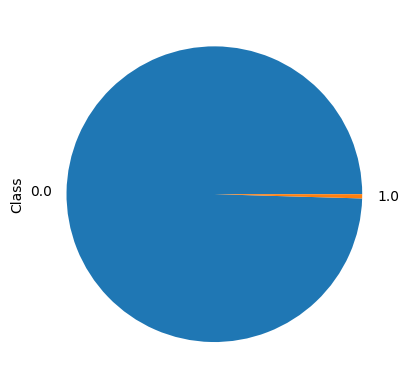

In [13]:
print((ccd.groupby('Class')['Class'].count()/ccd['Class'].count())*100)
((ccd.groupby('Class')['Class'].count()/ccd['Class'].count())*100).plot.pie()

In [14]:
classes = ccd['Class'].value_counts()
normal_value = round(classes[0]/ccd['Class'].count()*100,2)
fraud_values = round(classes[1]/ccd['Class'].count()*100,2)
print(normal_value)
print(fraud_values)

99.54
0.46


In [15]:
# let's check tthe correlation of the features

In [16]:
corr = ccd.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.005133,-0.006778,-0.070100,0.062500,-0.078409,-0.034896,-0.090833,0.058747,0.121555,...,-0.014549,-0.017840,-0.004436,-0.024318,0.067935,-0.027782,0.007356,0.024724,0.021676,0.025979
V1,-0.005133,1.000000,-0.265350,0.340209,-0.113672,0.111669,0.131124,0.288842,-0.100821,0.028161,...,-0.130360,0.028488,-0.077409,-0.009467,0.160007,0.004989,-0.164402,0.038024,-0.182553,-0.282520
V2,-0.006778,-0.265350,1.000000,-0.367666,0.141214,-0.257860,-0.032730,-0.106729,0.056491,-0.131279,...,0.101044,-0.141813,-0.024548,-0.022040,-0.096381,-0.059766,0.150845,-0.039495,-0.450657,0.269082
V3,-0.070100,0.340209,-0.367666,1.000000,-0.203624,0.337679,0.045761,0.505537,-0.320658,0.236318,...,-0.042579,0.233840,0.019674,0.023338,-0.173845,0.047818,-0.222927,-0.033227,-0.113477,-0.509598
V4,0.062500,-0.113672,0.141214,-0.203624,1.000000,-0.150788,-0.053166,-0.218038,0.121089,-0.210832,...,0.001229,-0.011508,0.001550,-0.038313,-0.041904,0.059956,0.055041,0.008587,0.121129,0.284406
V5,-0.078409,0.111669,-0.257860,0.337679,-0.150788,1.000000,0.167975,0.201502,-0.168718,0.028564,...,-0.070432,-0.071955,-0.004338,0.013386,-0.070018,-0.051329,-0.097425,-0.088931,-0.298808,-0.262259
V6,-0.034896,0.131124,-0.032730,0.045761,-0.053166,0.167975,1.000000,0.090206,-0.077223,0.039194,...,0.070511,-0.022523,0.013470,0.029255,0.064674,-0.009290,-0.085774,-0.020636,0.185588,-0.132319
V7,-0.090833,0.288842,-0.106729,0.505537,-0.218038,0.201502,0.090206,1.000000,-0.157793,0.078288,...,-0.162380,0.075530,0.081363,0.000852,-0.103887,-0.044890,-0.233155,-0.047199,0.226582,-0.421021
V8,0.058747,-0.100821,0.056491,-0.320658,0.121089,-0.168718,-0.077223,-0.157793,1.000000,-0.122622,...,-0.296299,0.115834,-0.079218,0.017887,0.041357,-0.007589,0.101544,0.077588,-0.048787,0.190885
V9,0.121555,0.028161,-0.131279,0.236318,-0.210832,0.028564,0.039194,0.078288,-0.122622,1.000000,...,-0.028893,0.047052,0.000319,0.006939,0.143577,0.015609,-0.071950,-0.074257,-0.012082,-0.213593


from matplotlib import pyplot as plt
_df_0['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['V3'].plot(kind='hist', bins=20, title='V3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='V3', y='V4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
_df_12['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['V3'].plot(kind='line', figsize=(8, 4), title='V3')
plt.gca().spines[['top', 'right']].set_visible(False)

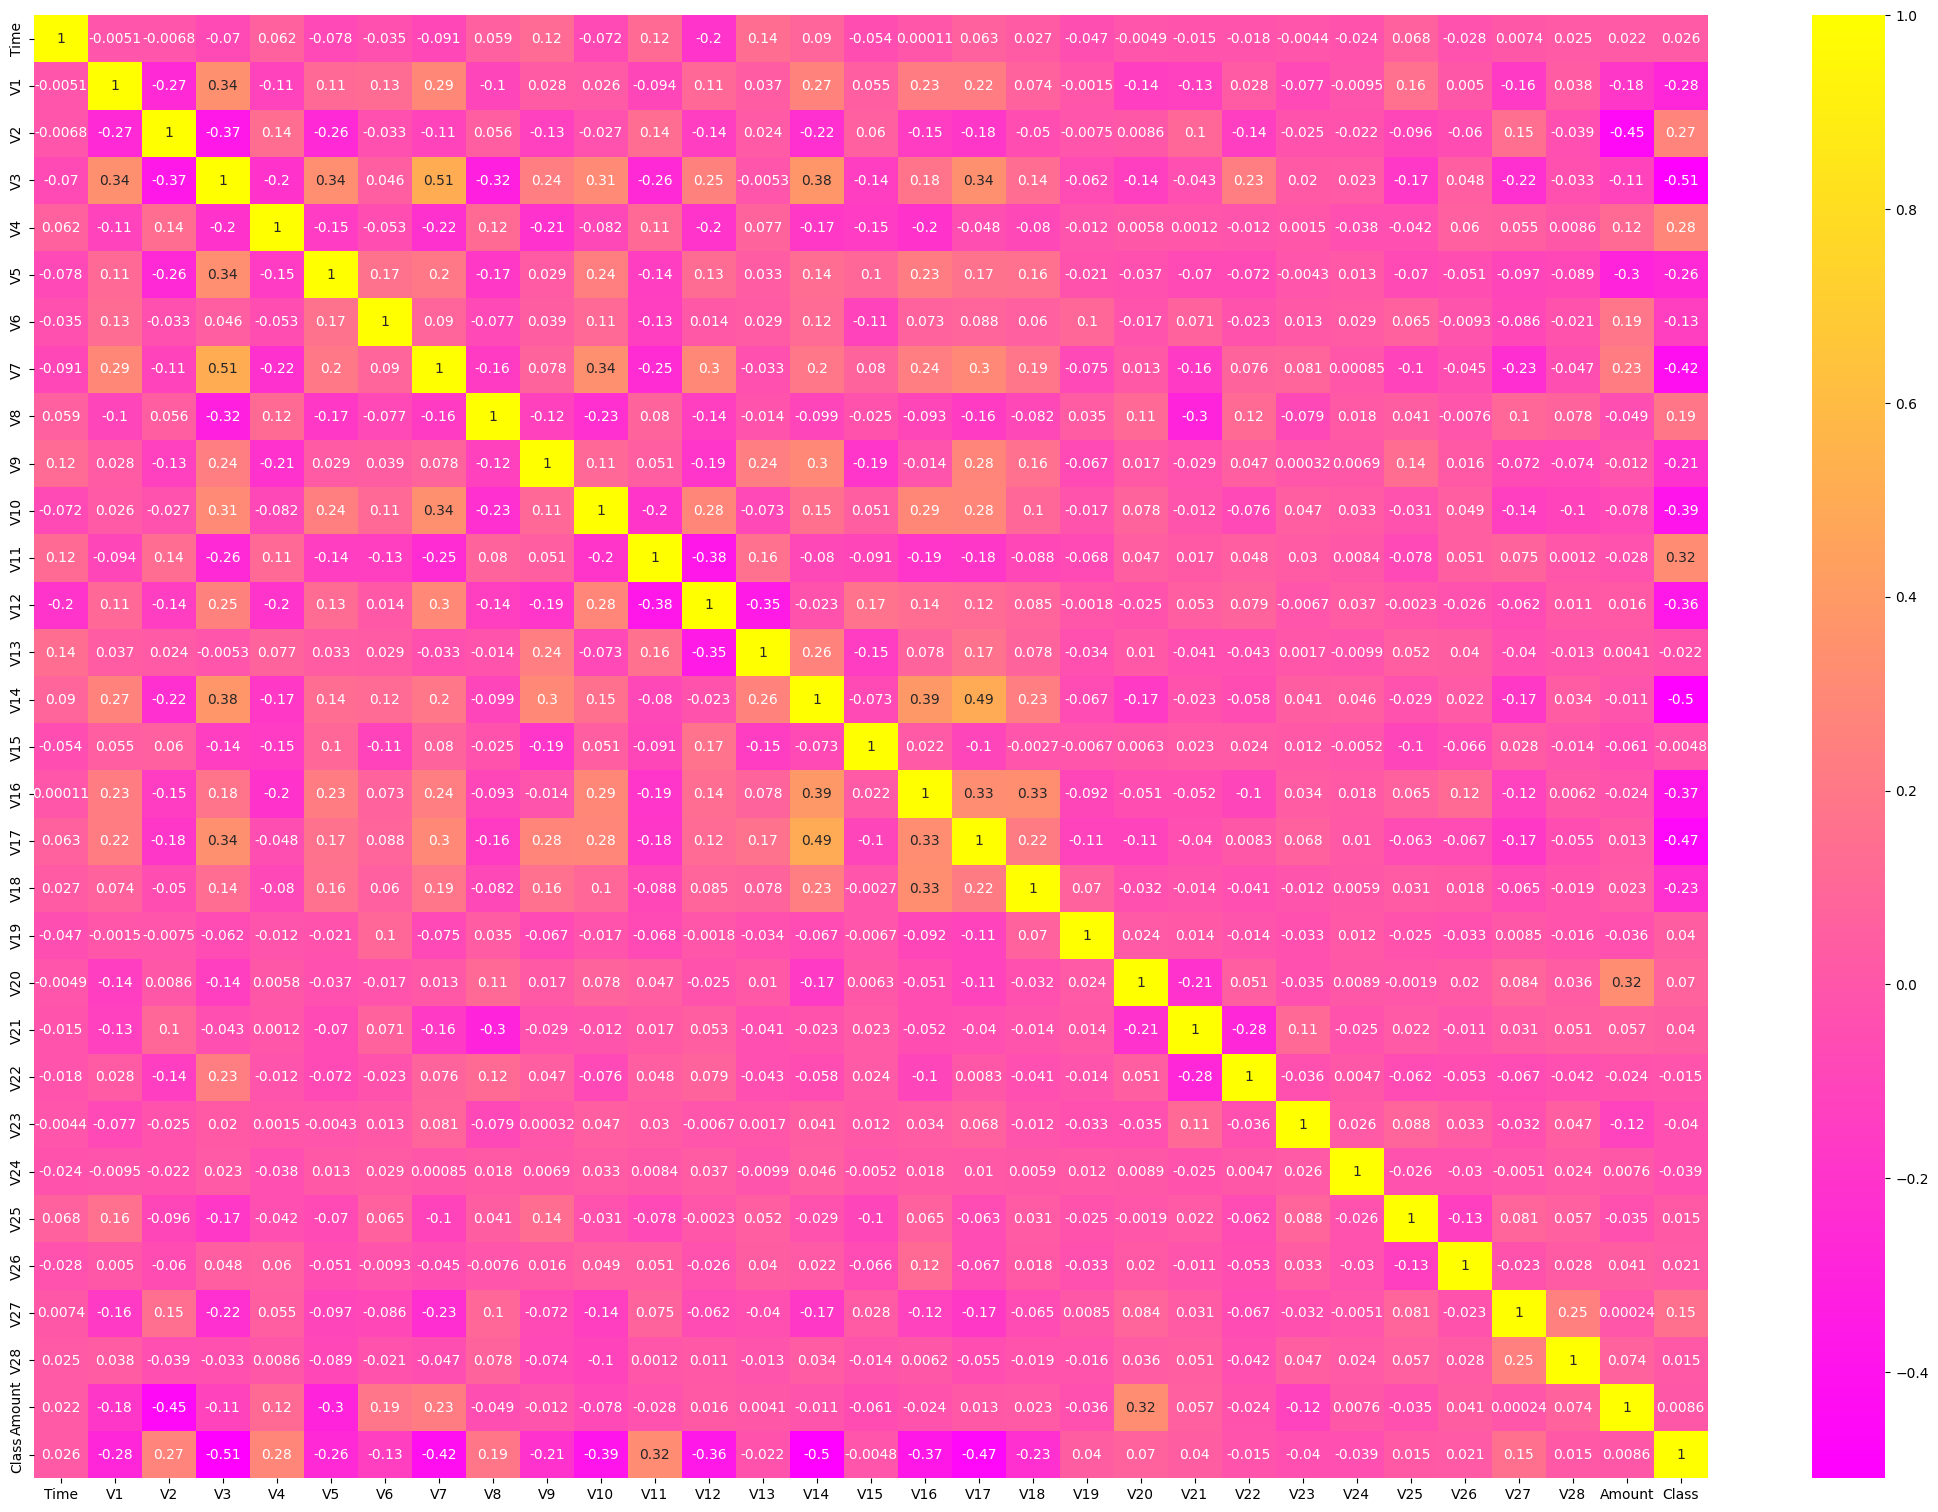

In [17]:
# plotting the heatmap for the correlation
plt.figure(figsize=(27,19))
sns.heatmap(corr, cmap = 'spring', annot= True )
plt.show()

In [18]:
# separte the data according to type of transaction i.e. fraud or legit

In [19]:
legit = ccd[ccd.Class == 0]

In [20]:
fraud = ccd[ccd.Class==1]

In [21]:
legit.Amount.describe()

count    15862.000000
mean        66.280151
std        188.898885
min          0.000000
25%          5.522500
50%         15.950000
75%         53.890000
max       7712.430000
Name: Amount, dtype: float64

In [22]:
fraud.Amount.describe()

count      73.000000
mean       90.307123
std       271.634360
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [23]:
# we can observe that the mean amount spent for fraud transactions is actually more than for the legit ones

In [24]:
ccd.groupby('Class').describe()

Time                                                               \
         count          mean          std    min      25%      50%      75%   
Class                                                                         
0.0    15862.0  12104.432165  8984.508696    0.0  3611.75  10977.0  20601.5   
1.0       73.0  15559.643836  7670.577525  406.0  8528.00  14073.0  21419.0   

                     V1            ...       V28             Amount  \
           max    count      mean  ...       75%       max    count   
Class                              ...                                
0.0    27370.0  15862.0 -0.219072  ...  0.075878  4.860769  15862.0   
1.0    27252.0     73.0 -7.929807  ...  0.503740  1.108933     73.0   

                                                                  
            mean         std  min     25%    50%    75%      max  
Class                                                             
0.0    66.280151  188.898885  0.0  5.5225  15.95  53.89  7712.43  
1.0    90.307123  271.634360  0.0  1.0000   1.00  99.99  1809.68  

[2 rows x 240 columns]

In [25]:
ccd.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,12104.432165,-0.219072,0.25000,0.862854,0.272641,-0.105868,0.124522,-0.112681,-0.016178,0.879120,...,0.028173,-0.064056,-0.161585,-0.035040,0.013076,0.117023,0.037111,0.011206,0.005907,66.280151
1.0,15559.643836,-7.929807,6.19312,-11.997831,6.555050,-5.474984,-2.480356,-8.354317,3.668478,-3.086988,...,0.671905,0.441100,-0.295856,-0.358994,-0.328925,0.216076,0.209323,0.927187,0.061380,90.307123


In [26]:
# there's a significant difference in the mean value for our normal transaction and mean value for our fraud transactions

In [27]:
# now to balance the data for legit and fraud transaction value points
# we will use sampling for creating a new dataset of normal transactions with 492 entries being selected randomly out of 284315

In [28]:
normal_sample = legit.sample(n=492)

In [29]:
# now merge the two datasets for fraud and legit transactions with equal number of sampl points

In [30]:
new_dataset = pd.concat([normal_sample, fraud], axis = 0) # axis =0 species row wise joining of the datasets l

In [31]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2760,2299,-0.449091,1.011487,1.756903,-0.148778,0.094598,-0.846753,1.084048,-0.465112,0.175563,...,-0.369136,-0.612276,-0.080785,0.341421,-0.214287,0.021269,0.043043,-0.267499,9.51,0.0
5810,6267,1.199402,0.372703,0.778445,0.844505,-0.320190,-0.647777,-0.059204,-0.204787,1.206606,...,-0.351994,-0.702953,0.211217,0.351504,0.100011,0.063383,-0.034503,0.013731,0.89,0.0
5255,5092,1.206289,0.357865,0.750819,0.970252,-0.599010,-1.284380,0.078146,-0.360401,1.235856,...,-0.308317,-0.651299,0.143879,0.869548,0.226591,0.099692,-0.062260,0.016959,15.62,0.0
5442,5440,-0.723547,1.063572,1.809969,0.646871,0.009725,0.352366,0.240156,0.084051,1.071990,...,-0.037354,0.451583,-0.148149,0.262001,-0.284513,0.410128,0.082737,0.188286,6.99,0.0
12227,21372,-0.430659,1.032748,-0.115862,-0.993431,2.702697,3.338625,0.237196,0.642019,1.118283,...,-0.553120,-1.186542,-0.046867,0.870520,0.000059,0.026425,0.167398,-0.080541,8.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15566,26961,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,...,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99,1.0
15736,27163,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99,1.0
15751,27187,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,...,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,99.99,1.0
15781,27219,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1.0


In [32]:
new_dataset['Class'].value_counts()

Class
0.0    492
1.0     73
Name: count, dtype: int64

In [33]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,11430.926829,-0.243374,0.365009,0.904587,0.263025,-0.180621,0.142136,-0.070588,-0.024172,0.911524,...,0.080920,-0.088839,-0.128673,-0.042398,0.023417,0.093890,0.054325,0.042037,-0.000007,69.454370
1.0,15559.643836,-7.929807,6.193120,-11.997831,6.555050,-5.474984,-2.480356,-8.354317,3.668478,-3.086988,...,0.671905,0.441100,-0.295856,-0.358994,-0.328925,0.216076,0.209323,0.927187,0.061380,90.307123


from matplotlib import pyplot as plt
_df_16['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['V3'].plot(kind='hist', bins=20, title='V3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='V3', y='V4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V5']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V5')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V6']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V6')

from matplotlib import pyplot as plt
_df_28['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['V3'].plot(kind='line', figsize=(8, 4), title='V3')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [34]:
# here we can drop the time feature and instead use a derived column using timedelta function of pandas to represent the duration that is difference between two time values
delta_time = pd.to_timedelta(new_dataset['Time'], unit = 's')
# create the derived column
new_dataset['time_hour']=(delta_time.dt.components.hours).astype(int)
# now drop the time column
new_dataset.drop(columns='Time', axis=1, inplace = True)

In [35]:
new_dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_hour
2760,-0.449091,1.011487,1.756903,-0.148778,0.094598,-0.846753,1.084048,-0.465112,0.175563,0.432659,...,-0.612276,-0.080785,0.341421,-0.214287,0.021269,0.043043,-0.267499,9.51,0.0,0
5810,1.199402,0.372703,0.778445,0.844505,-0.320190,-0.647777,-0.059204,-0.204787,1.206606,-0.499356,...,-0.702953,0.211217,0.351504,0.100011,0.063383,-0.034503,0.013731,0.89,0.0,1
5255,1.206289,0.357865,0.750819,0.970252,-0.599010,-1.284380,0.078146,-0.360401,1.235856,-0.439490,...,-0.651299,0.143879,0.869548,0.226591,0.099692,-0.062260,0.016959,15.62,0.0,1
5442,-0.723547,1.063572,1.809969,0.646871,0.009725,0.352366,0.240156,0.084051,1.071990,-0.329873,...,0.451583,-0.148149,0.262001,-0.284513,0.410128,0.082737,0.188286,6.99,0.0,1
12227,-0.430659,1.032748,-0.115862,-0.993431,2.702697,3.338625,0.237196,0.642019,1.118283,-0.300136,...,-1.186542,-0.046867,0.870520,0.000059,0.026425,0.167398,-0.080541,8.92,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15566,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,-8.511767,...,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99,1.0,7
15736,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,-8.442262,...,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99,1.0,7
15751,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,-8.372753,...,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,99.99,1.0,7
15781,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,...,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1.0,7


from matplotlib import pyplot as plt
new_dataset['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_dataset['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_dataset['V3'].plot(kind='hist', bins=20, title='V3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_dataset['V4'].plot(kind='hist', bins=20, title='V4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_dataset.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_dataset.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_dataset.plot(kind='scatter', x='V3', y='V4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_dataset.plot(kind='scatter', x='V4', y='V5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Class']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_dataset.sort_values('Class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Class')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Class']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_dataset.sort_values('Class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Class')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Class']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_dataset.sort_values('Class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Class')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Class']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_dataset.sort_values('Class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Class')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
new_dataset['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_dataset['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_dataset['V3'].plot(kind='line', figsize=(8, 4), title='V3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_dataset['V4'].plot(kind='line', figsize=(8, 4), title='V4')
plt.gca().spines[['top', 'right']].set_visible(False)

# separating the features and target variables

In [36]:
x = new_dataset.drop('Class', axis=1)

In [37]:
y = new_dataset['Class']

In [38]:
x.shape

(565, 30)

In [39]:
y.shape

(565,)

# splitting the data into training and testing data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)

In [41]:
#accumulating all the column names under one variable
cols = list(x.columns.values)

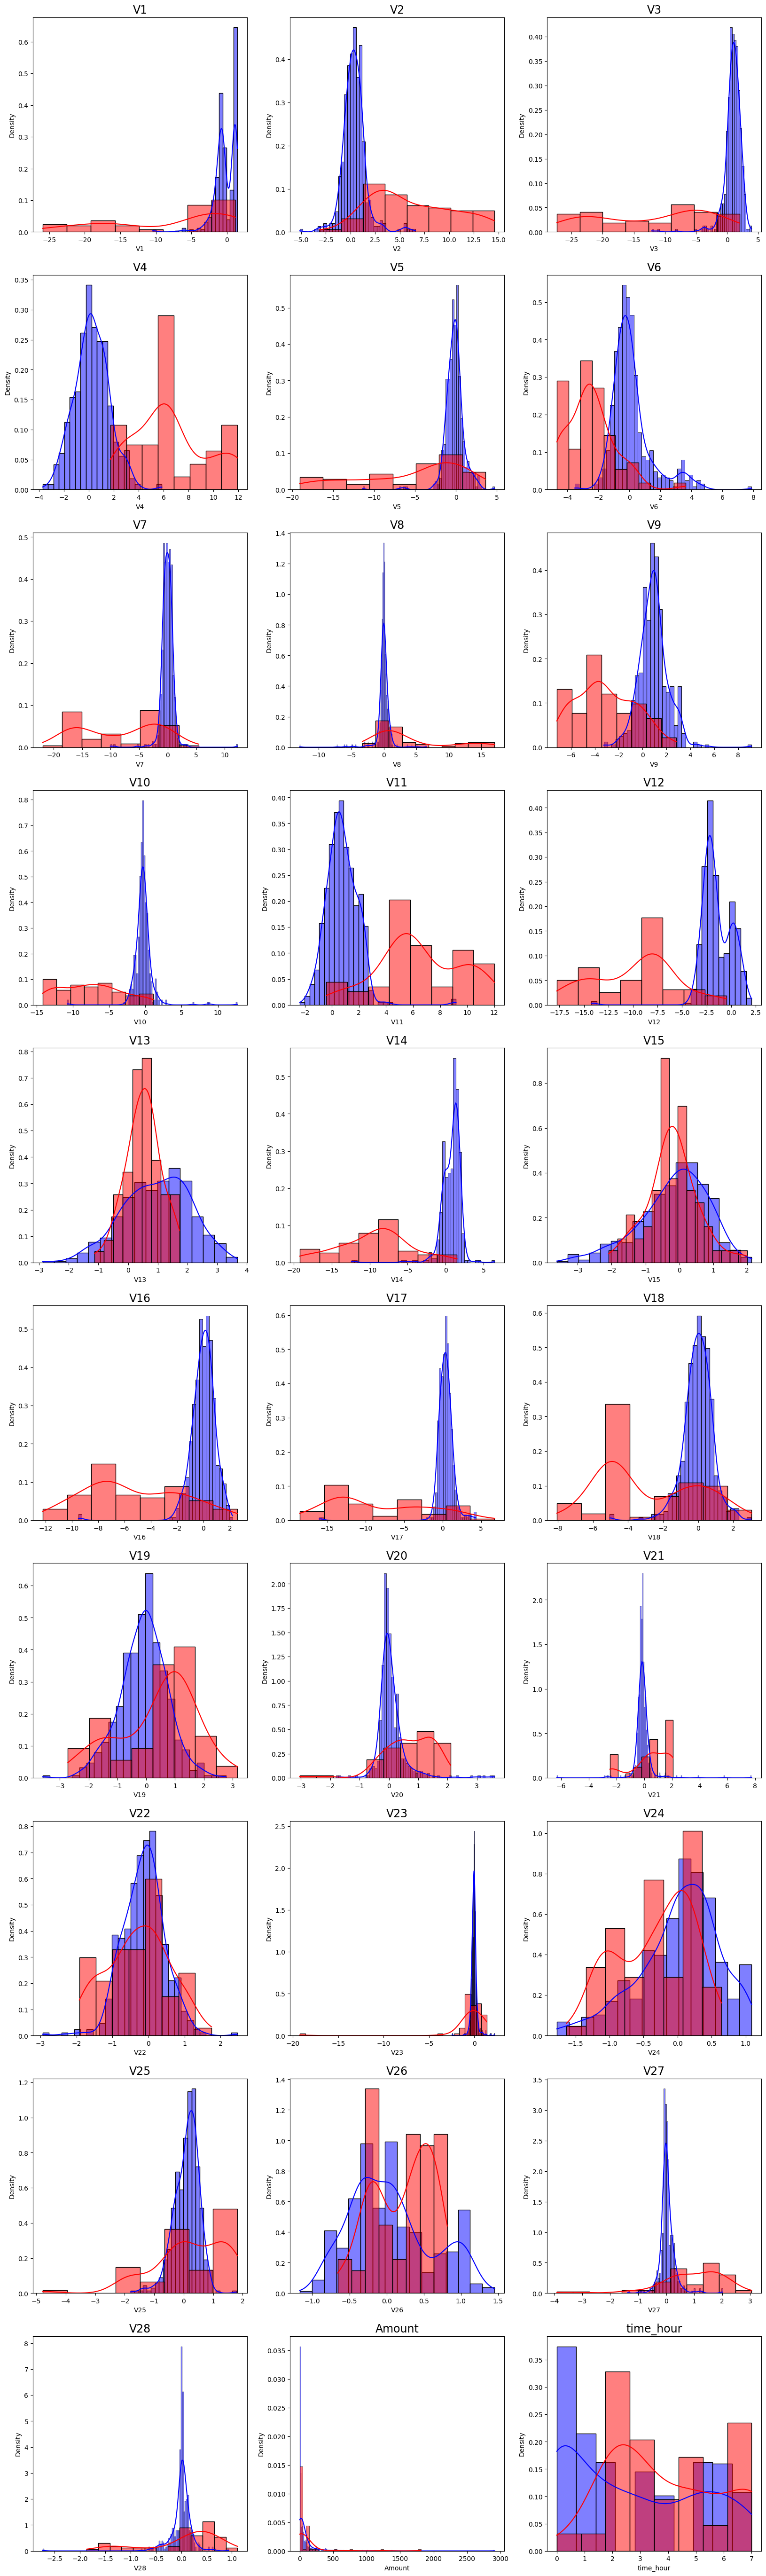

In [42]:
normal_entries = new_dataset.Class==0
fraud_entries = new_dataset.Class==1

plt.figure(figsize=(20,70))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(x[col][normal_entries], color='blue', kde = True, stat = 'density')
    sns.histplot(x[col][fraud_entries], color='red', kde = True, stat = 'density')
    plt.title(col, fontsize=17)
plt.show()


In [43]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
pred_test = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model evaluation

In [44]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
def Plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.show()



In [45]:
# accuracy on training data
acc_score= round(accuracy_score(y_pred, y_train)*100,2)

In [46]:
print('the accuracy score for training data of our model is :', acc_score)

the accuracy score for training data of our model is : 98.58


In [47]:
y_pred = model.predict(x_test)
acc_score = round(accuracy_score(y_pred, y_test)*100,2)

In [48]:
print('the accuracy score of our model is :', acc_score)

the accuracy score of our model is : 96.48


In [49]:
from sklearn import metrics

In [50]:
score = round(model.score(x_test, y_test)*100,2)
print('score of our model is :', score)

score of our model is : 96.48


In [51]:
class_report = classification_report(y_pred, y_test)
print('classification report of our model: ', class_report)

classification report of our model:                precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       127
         1.0       0.78      0.93      0.85        15

    accuracy                           0.96       142
   macro avg       0.88      0.95      0.91       142
weighted avg       0.97      0.96      0.97       142



In [52]:
# we have achieved a model with decent accuracy score

# Thank You